In [4]:
#!pip install wordcloud

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx


In [6]:
df = pd.read_csv("../data/processed/movie_data_processed.csv")
df.head(5)

,Title,Year,Rated,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,imdbRating,imdbVotes,imdbID,BoxOffice,wr
0,Breaking Bad,NaN,TV-MA,49 min,"Crime, Drama, Thriller",Unknown,Vince Gilligan,"Bryan Cranston, Aaron Paul, Anna Gunn",A chemistry teacher diagnosed with inoperable ...,"English, Spanish",United States,Won 16 Primetime Emmys. 169 wins & 269 nominat...,https://m.media-amazon.com/images/M/MV5BMzU5ZG...,"[{'Source': 'Internet Movie Database', 'Value'...",9.5,2225876,tt0903747,Unknown,9.465909
1,The Shawshank Redemption,1994-01-01,R,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",A banker convicted of uxoricide forms a friend...,English,United States,Nominated for 7 Oscars. 21 wins & 42 nominatio...,https://m.media-amazon.com/images/M/MV5BMDAyY2...,"[{'Source': 'Internet Movie Database', 'Value'...",9.3,2945396,tt0111161,"$28,767,189",9.275553
2,Band of Brothers,2001-01-01,TV-MA,594 min,"Drama, History, War",Unknown,Unknown,"Scott Grimes, Damian Lewis, Ron Livingston",The story of Easy Company of the U.S. Army 101...,"English, Dutch, French, German, Lithuanian","United Kingdom, United States",Won 6 Primetime Emmys. 34 wins & 26 nomination...,https://m.media-amazon.com/images/M/MV5BMTQ3NT...,"[{'Source': 'Internet Movie Database', 'Value'...",9.4,542582,tt0185906,Unknown,9.267586
3,Band of Brothers,2001-01-01,TV-MA,594 min,"Drama, History, War",Unknown,Unknown,"Scott Grimes, Damian Lewis, Ron Livingston",The story of Easy Company of the U.S. Army 101...,"English, Dutch, French, German, Lithuanian","United Kingdom, United States",Won 6 Primetime Emmys. 34 wins & 26 nomination...,https://m.media-amazon.com/images/M/MV5BMTQ3NT...,"[{'Source': 'Internet Movie Database', 'Value'...",9.4,542582,tt0185906,Unknown,9.267586
4,Band of Brothers,2001-01-01,TV-MA,594 min,"Drama, History, War",Unknown,Unknown,"Scott Grimes, Damian Lewis, Ron Livingston",The story of Easy Company of the U.S. Army 101...,"English, Dutch, French, German, Lithuanian","United Kingdom, United States",Won 6 Primetime Emmys. 34 wins & 26 nomination...,https://m.media-amazon.com/images/M/MV5BMTQ3NT...,"[{'Source': 'Internet Movie Database', 'Value'...",9.4,542582,tt0185906,Unknown,9.267586


# 1. Phân phối của các cột numeric

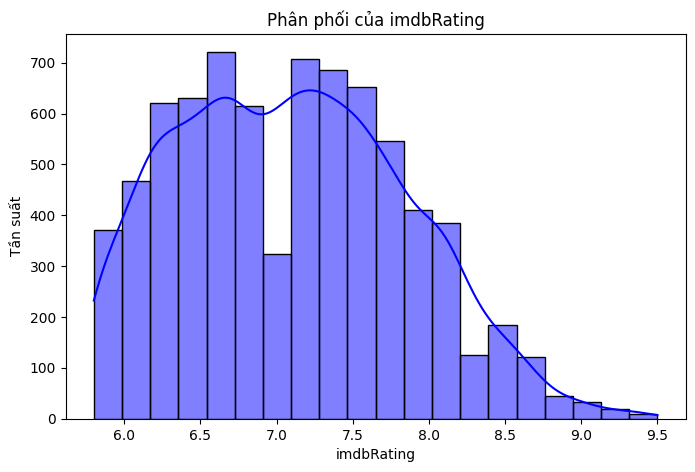

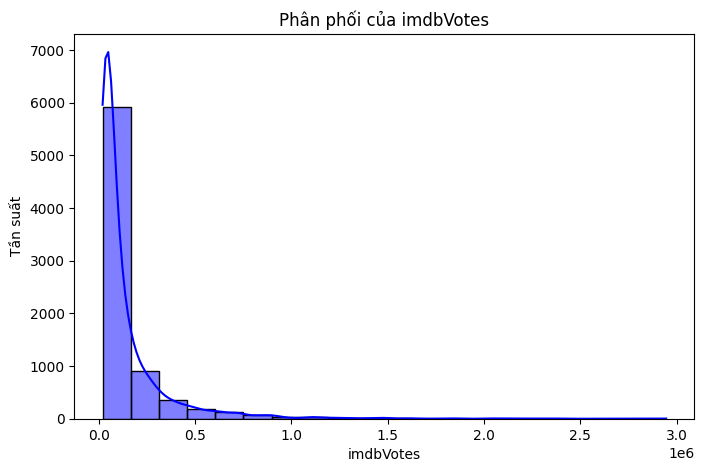

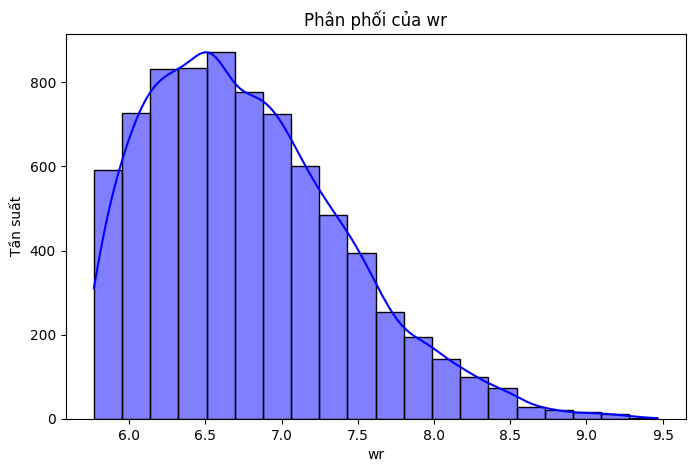

In [7]:
# Biểu đồ Histogram cho các cột số
numerical_columns = ['imdbRating', 'imdbVotes', 'wr']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Phân phối của {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.show()

# 2. 10 thể loại phổ biến nhất

In [8]:
# plt.figure(figsize=(10, 6))
# df['Genre'].value_counts().head(10).plot.pie(autopct='%1.1f%%', cmap='Set3')
# plt.title('10 thể loại phổ biến nhất')
# plt.ylabel('')
# plt.show()

# 3. 10 ngôn ngữ phổ biến nhất

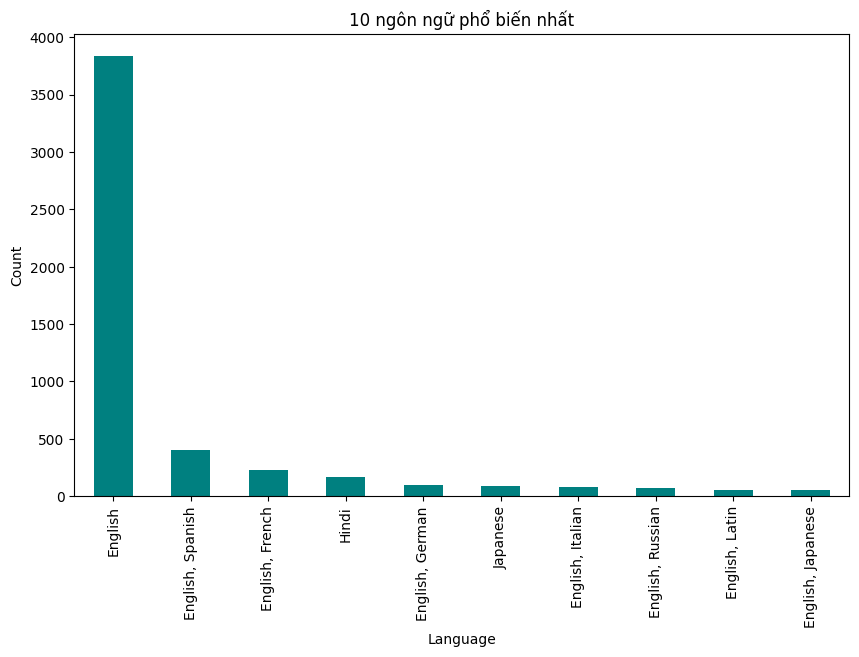

In [9]:
plt.figure(figsize=(10, 6))
df['Language'].value_counts().head(10).plot.bar(color='teal')
plt.title('10 ngôn ngữ phổ biến nhất')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

# 4. Mối tương quan giữa các cột numeric

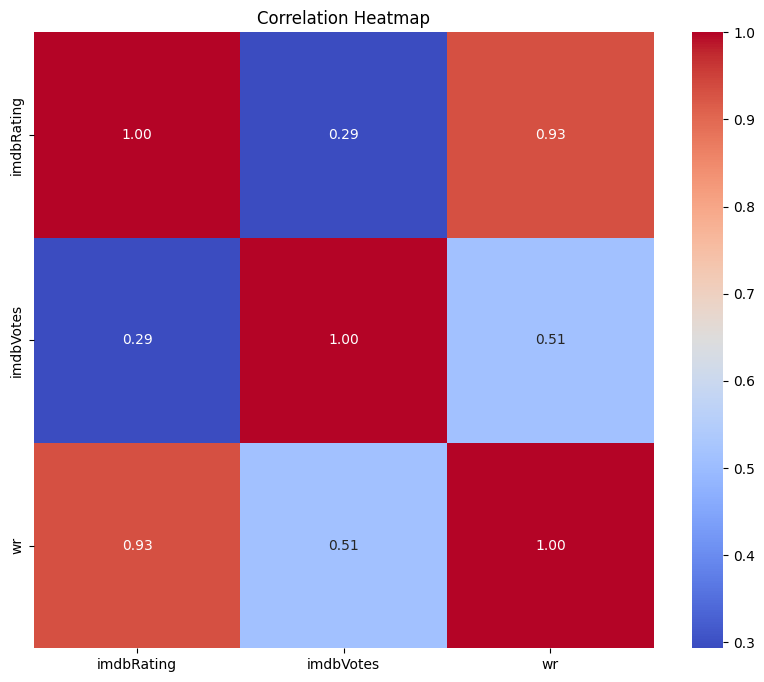

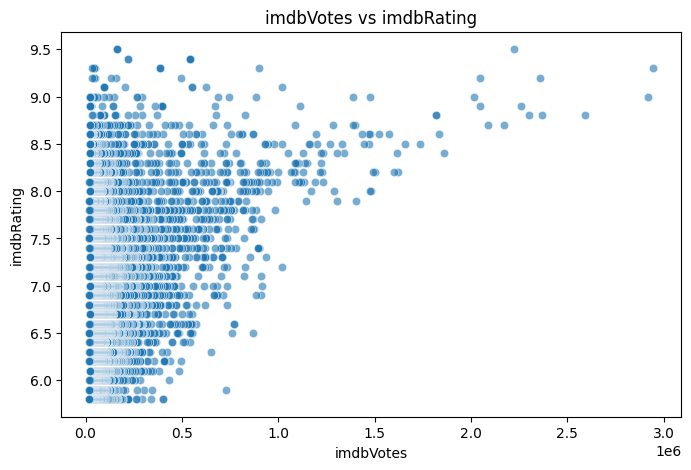

In [10]:
# Heatmap cho hệ số tương quan
plt.figure(figsize=(10, 8))
correlation = df[['imdbRating', 'imdbVotes', 'wr']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot giữa imdbRating và imdbVotes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='imdbVotes', y='imdbRating', data=df, alpha=0.6)
plt.title('imdbVotes vs imdbRating')
plt.xlabel('imdbVotes')
plt.ylabel('imdbRating')
plt.show()


# 5. IMDb Rating trung bình qua các năm

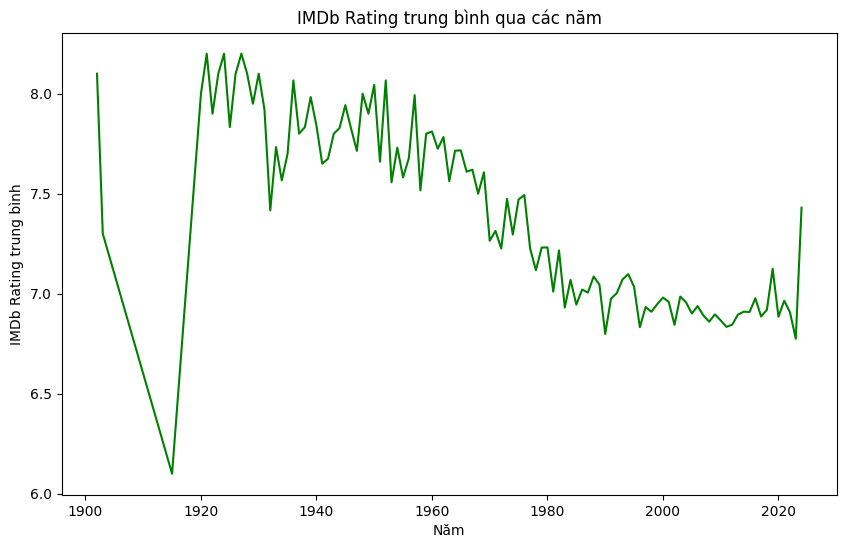

In [11]:
df_copy = df.copy()
df_copy['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
yearly_trend = df_copy.groupby('Year')['imdbRating'].mean().dropna()

plt.figure(figsize=(10, 6))
yearly_trend.plot(color='green')
plt.title('IMDb Rating trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('IMDb Rating trung bình')
plt.show()

# 6. 10 thể loại có IMDb Rating cao nhất

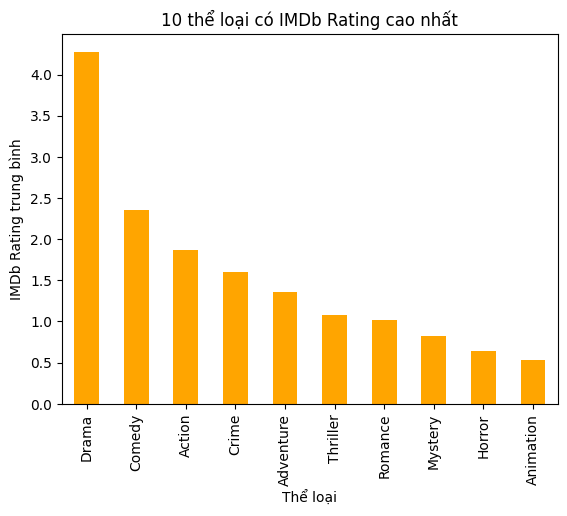

In [12]:
# Phân tích Genre và IMDb Rating
genre_ratings = df['Genre'].str.get_dummies(sep=', ').mul(df['imdbRating'], axis=0).mean()
genre_ratings.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('10 thể loại có IMDb Rating cao nhất')
plt.xlabel('Thể loại')
plt.ylabel('IMDb Rating trung bình')
plt.show()

# 7. Tổng wr cho từng thể loại

In [13]:
genre_wr_sum = genres.sum(axis=0)
plt.figure(figsize=(12, 6))
genre_wr_sum.sort_values().plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Tổng WR cho từng thể loại', fontsize=16)
plt.xlabel('Thể loại', fontsize=14)
plt.ylabel('Tổng WR', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'genres' is not defined

# 8. Các từ khóa phổ biến trong cốt truyện phim

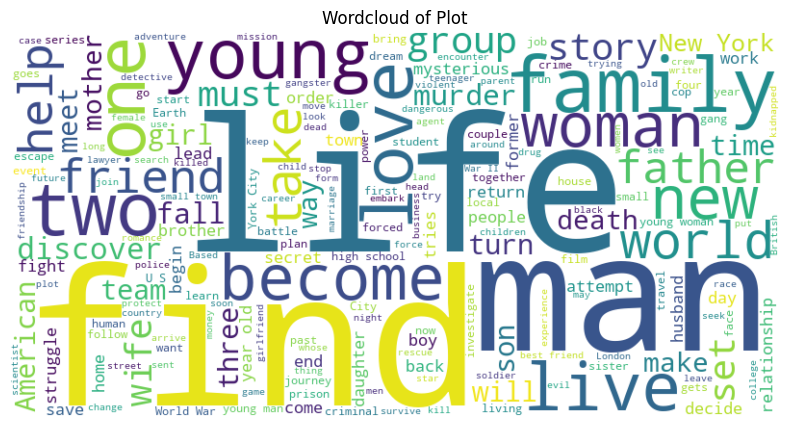

In [ ]:
# Tạo WordCloud
text = " ".join(df['Plot'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Plot')
plt.show()


# 9. Mối quan hệ giữa các diễn viên

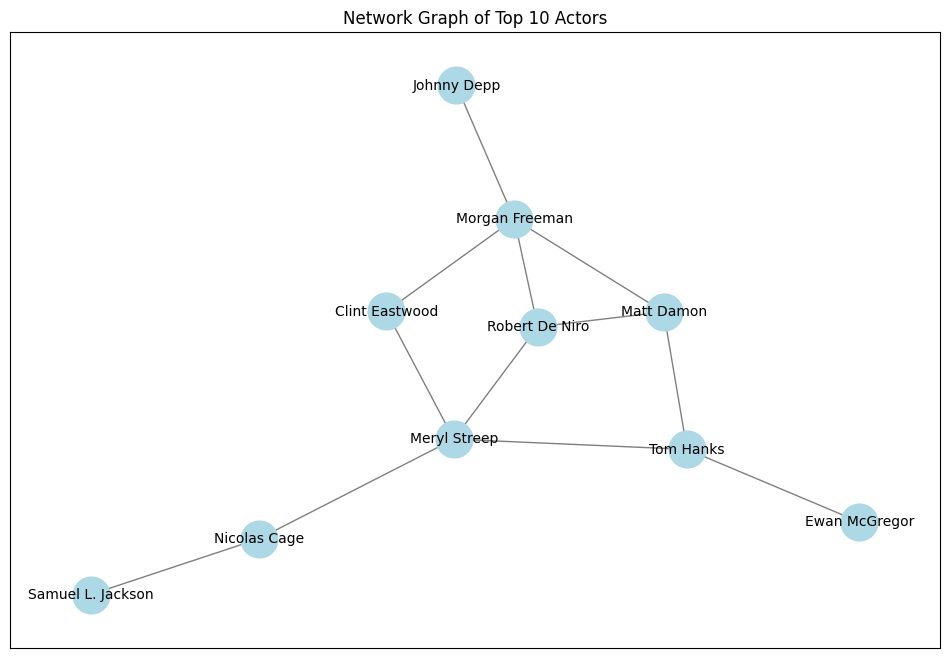

In [ ]:

# Tạo dữ liệu network
actor_pairs = df['Actors'].dropna().str.split(', ').explode().value_counts()
top_actors = actor_pairs.head(10).index

G = nx.Graph()
for movie in df['Actors'].dropna():
    actors = movie.split(', ')
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            if actors[i] in top_actors and actors[j] in top_actors:
                G.add_edge(actors[i], actors[j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Network Graph of Top 10 Actors')
plt.show()
